In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.color import rgb2hsv, rgb2gray, rgb2yuv
from PIL import Image


In [2]:
# Step (a): Read the image and compute its Fourier transform
# Load the image and convert it to grayscale
image = Image.open('lenaNoise.png').convert('L')
image_array = np.array(image)

# Compute the 2D Fourier Transform of the image
f_transform = np.fft.fft2(image_array)

# Shift the zero frequency component to the center of the spectrum
f_shifted = np.fft.fftshift(f_transform)


In [3]:
# Step (b): Create masks to keep different numbers of low frequencies
def low_frequency_mask(shape, size):
    """
    Create a mask to keep the low-frequency components of the Fourier transform.
    
    Parameters:
    - shape: tuple of ints, the shape of the Fourier-transformed image
    - size: int, the size of the square region to keep (number of low frequencies)
    
    Returns:
    - mask: numpy array, with ones in the central square and zeros elsewhere
    """
    rows, cols = shape
    mask = np.zeros((rows, cols), dtype=np.uint8)
    # Calculate the center point
    crow, ccol = rows // 2, cols // 2
    # Define the half size for indexing
    half_size = size // 2
    # Set ones in the central square region
    mask[crow - half_size : crow + half_size + size % 2,
         ccol - half_size : ccol + half_size + size % 2] = 1
    return mask

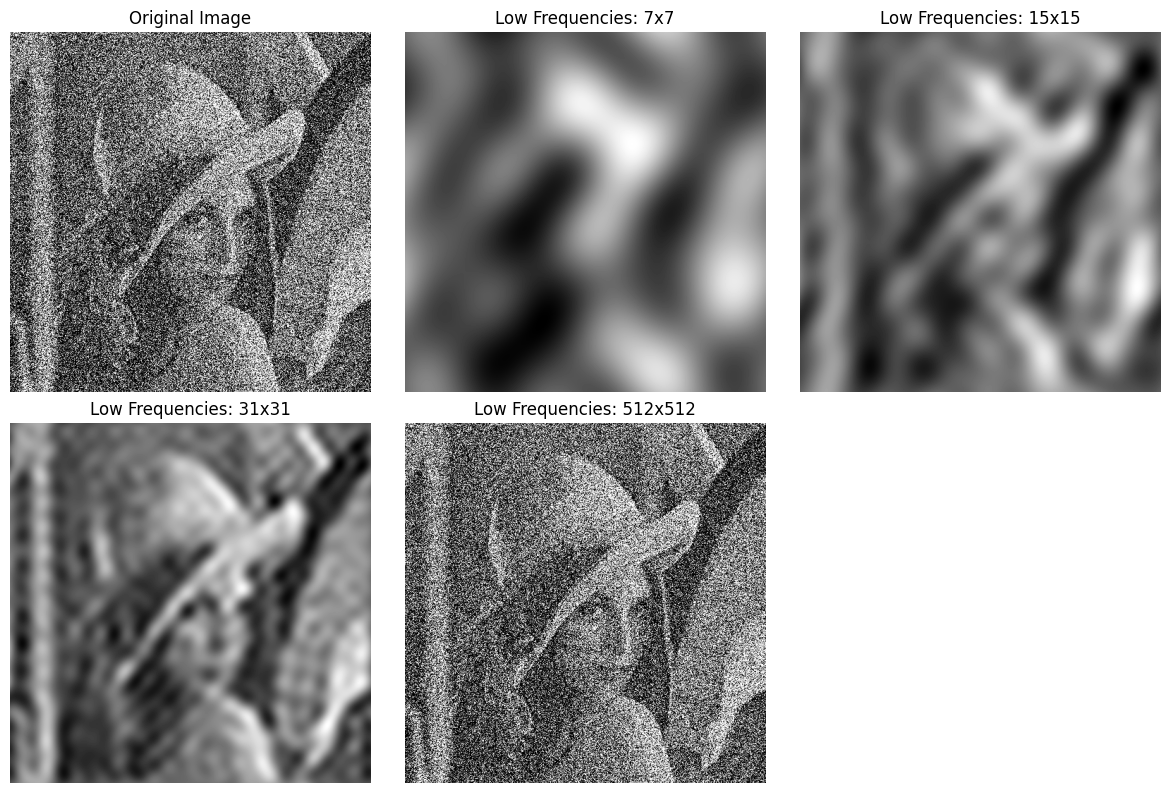

In [4]:
def main():

    # Specify the sizes of low-frequency squares to keep
    sizes = [7, 15, 31, min(image_array.shape)]

    # List to store the reconstructed images
    reconstructed_images = []

    for size in sizes:
        # Create the mask for the current size
        mask = low_frequency_mask(image_array.shape, size)
        # Apply the mask to the shifted Fourier transform
        f_shifted_masked = f_shifted * mask
        # Step (c): Reconstruct the image using the inverse Fourier transform
        # Shift back the zero frequency component to the original position
        f_ishift = np.fft.ifftshift(f_shifted_masked)
        # Compute the inverse 2D Fourier Transform
        img_back = np.fft.ifft2(f_ishift)
        # Take the absolute value and normalize the result
        img_back = np.abs(img_back)
        img_back = (img_back - img_back.min()) / (img_back.max() - img_back.min()) * 255
        img_back = img_back.astype(np.uint8)
        # Store the reconstructed image along with its size
        reconstructed_images.append((size, img_back))

        # Display the original and reconstructed images

    plt.figure(figsize=(12, 8))

    # Show the original image
    plt.subplot(2, 3, 1)
    plt.imshow(image_array, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    # Show the reconstructed images with different low-frequency components
    for i, (size, img) in enumerate(reconstructed_images, start=2):
        plt.subplot(2, 3, i)
        plt.imshow(img, cmap='gray')
        plt.title(f'Low Frequencies: {size}x{size}')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()
    